In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v2.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,idle_power,active_power,files,Unnamed: 17
0,3,datacenter,75010.809264,1,storage,900000.0,20992.0,106.078447,1.000013659472681:,615.254992,3.000041,0.003,0.004,198.0,3.0,5.8,"55596,3072,15.520749003096359:1-269738,1024,5....",NaN
1,3,datacenter,75010.809264,2,storage,900000.0,24064.0,121.605013,1.0000000435601588:,705.309073,3.000000,0.003,0.004,198.0,3.0,5.8,"304608,3584,18.103752520403432:361644,3072,15....",NaN
2,3,datacenter,75010.809264,3,storage,900000.0,27136.0,152.628102,1.000000126982307:,885.242992,3.000000,0.003,0.004,198.0,3.0,5.8,"305050,3584,18.10795200666362:303723,3584,18.1...",NaN
3,3,datacenter,75010.809264,4,storage,900000.0,21504.0,108.669959,1.0000002596075253:,630.285760,3.000001,0.003,0.004,198.0,3.0,5.8,"29-240840,3072,15.522980568943678:1-270738,102...",NaN
4,3,datacenter,75010.809264,5,storage,900000.0,17920.0,106.092757,1.0000005200268733:,615.337989,3.000002,0.003,0.004,198.0,3.0,5.8,"289404,512,2.5953087119314207:4-760114,512,2.5...",NaN


820.0 files at datacenter 'datacenter'.


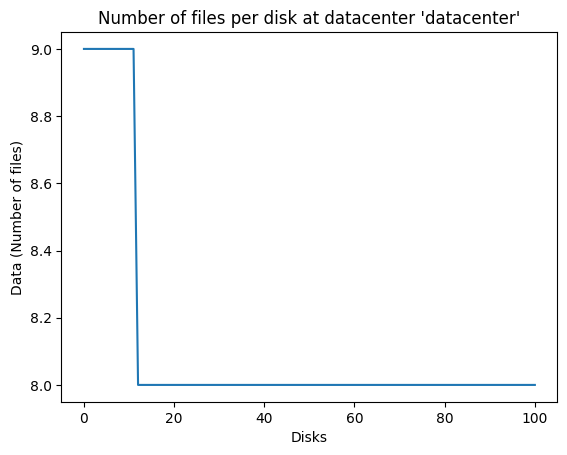

The cloud provider has 820.0 files stored.


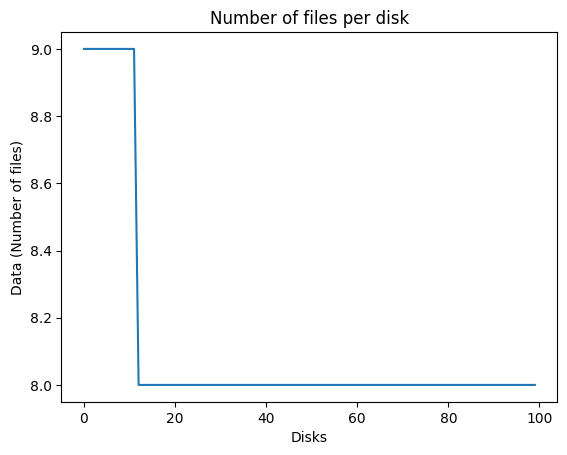

In [2]:
labels = np.unique(dataset['datacenter_name'])
files_per_datacenter = np.array([])
files_per_host = np.array([])

for i in range(len(labels)):
    files_per_datacenter_per_host = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        if pd.notna(sample['files']):
            files_per_host = np.append(files_per_host, len(sample['files'].split(":")) - 1)
            files_per_datacenter_per_host = np.append(files_per_host, len(sample['files'].split(":")) - 1)        
    files_per_datacenter = np.append(files_per_datacenter, sum(files_per_datacenter_per_host))
    
    print(f"{sum(files_per_datacenter_per_host)} files at datacenter '{labels[i]}'.")
    plt.plot(np.arange(len(files_per_datacenter_per_host)), files_per_datacenter_per_host, label="Files per host")
    plt.xlabel("Disks")
    plt.ylabel("Data (Number of files)")
    plt.title(f"Number of files per disk at datacenter '{labels[i]}'")
    # plt.legend()
    plt.show()

print(f"The cloud provider has {sum(files_per_datacenter)} files stored.")
plt.plot(np.arange(len(files_per_host)), files_per_host, label="Files per disk")
plt.xlabel("Disks")
plt.ylabel("Data (Number of files)")
plt.title("Number of files per disk")
# plt.legend()
plt.show()